## Prep

In [10]:
# import os
# import numpy as np
# import librosa
# import librosa.display
# import matplotlib.pyplot as plt

# # Định nghĩa hai file để so sánh
# file_path_1 = r"D:\Workplace\.SPRING2025\AIL303m\Bee_Swarming\buzz 1\Train\None_swarming\1624315499698_tha chua dang nhot_210621\1624315499698_tha chua dang nhot_210621_30.wav"
# file_path_2 = r"D:\Workplace\.SPRING2025\AIL303m\Bee_Swarming\buzz 1\Train\Swarming\Chiadan_6cau_12_04_2022_12h_14h_1h30chiadan\Chiadan_6cau_12_04_2022_12h_14h_1h30chiadan_28.wav"

# # Kiểm tra xem file có tồn tại không
# if not os.path.exists(file_path_1) or not os.path.exists(file_path_2):
#     raise FileNotFoundError("Một trong hai file không tồn tại!")

# # Hàm tiền xử lý và trích xuất MFCC, Delta, Delta-Delta
# def process_audio(file_path):
#     y, sr = librosa.load(file_path, sr=None)

#     # Áp dụng bộ lọc nhấn mạnh
#     pre_emphasis = 0.98
#     emphasized_signal = np.append(y[0], y[1:] - pre_emphasis * y[:-1])

#     # Tính MFCC
#     n_mfcc = 40
#     mfccs = librosa.feature.mfcc(y=emphasized_signal, sr=sr, n_mfcc=n_mfcc)

#     # Tính Delta (đạo hàm bậc 1) và Delta-Delta
#     delta_mfcc = librosa.feature.delta(mfccs)
#     delta2_mfcc = librosa.feature.delta(mfccs, order=2)

#     return y, emphasized_signal, mfccs, delta_mfcc, delta2_mfcc, sr

# # Xử lý hai tệp âm thanh
# y1, emphasized_signal1, mfccs1, delta_mfcc1, delta2_mfcc1, sr1 = process_audio(file_path_1)
# y2, emphasized_signal2, mfccs2, delta_mfcc2, delta2_mfcc2, sr2 = process_audio(file_path_2)

# # Vẽ đồ thị so sánh
# plt.figure(figsize=(15, 12))

# plt.subplot(3, 2, 1)
# librosa.display.specshow(mfccs1, x_axis="time")
# plt.colorbar()
# plt.title("MFCCs - Swarming")

# plt.subplot(3, 2, 2)
# librosa.display.specshow(mfccs2, x_axis="time")
# plt.colorbar()
# plt.title("MFCCs - Non-Swarming")

# plt.subplot(3, 2, 3)
# librosa.display.specshow(delta_mfcc1, x_axis="time")
# plt.colorbar()
# plt.title("Delta MFCCs - Swarming")

# plt.subplot(3, 2, 4)
# librosa.display.specshow(delta_mfcc2, x_axis="time")
# plt.colorbar()
# plt.title("Delta MFCCs - Non-Swarming")

# plt.subplot(3, 2, 5)
# librosa.display.specshow(delta2_mfcc1, x_axis="time")
# plt.colorbar()
# plt.title("Delta-Delta MFCCs - Swarming")

# plt.subplot(3, 2, 6)
# librosa.display.specshow(delta2_mfcc2, x_axis="time")
# plt.colorbar()
# plt.title("Delta-Delta MFCCs - Non-Swarming")

# plt.tight_layout()
# plt.show()


### trich xuat feature

In [11]:
# import os
# import librosa
# import numpy as np
# import pandas as pd
# from tqdm import tqdm

# def extract_mfcc(file_path, n_mfcc=60, hop_length=512):
#     try:
#         y, sr = librosa.load(file_path, sr=16000)

#         # Apply pre-emphasis
#         pre_emphasis = 0.98
#         emphasized_signal = np.append(y[0], y[1:] - pre_emphasis * y[:-1])

#         # Compute MFCCs
#         mfccs = librosa.feature.mfcc(y=emphasized_signal, sr=sr, n_mfcc=n_mfcc, hop_length=hop_length)

#         # Compute delta-delta (second derivative) only
#         delta2_mfccs = librosa.feature.delta(mfccs, order=2)

#         # Lấy giá trị trung bình của từng hệ số
#         mfcc_mean = mfccs.mean(axis=1)
#         delta2_mean = delta2_mfccs.mean(axis=1)

#         return mfcc_mean, delta2_mean, None

#     except Exception as e:
#         return None, None, str(e)


# def extract_features_from_folder(root_folder, output_folder, dataset_type, n_mfcc=60):
#     all_data = []
#     errors = []

#     for dirpath, _, filenames in os.walk(root_folder):
#         for file in tqdm(filenames, desc=f"Processing {dirpath}", leave=False):
#             if file.endswith(('.wav', '.mp3')):
#                 file_path = os.path.join(dirpath, file)
#                 relative_path = os.path.relpath(file_path, root_folder)
#                 parts = relative_path.split(os.sep)

#                 # Xác định category (Swarming hoặc Non-swarming)
#                 category = parts[0] if len(parts) > 0 else "Unknown"

#                 # Ánh xạ category thành label (1: Swarming, 0: Non-swarming)
#                 label = 1 if category.lower() == "swarming" else 0

#                 mfcc, delta2, error = extract_mfcc(file_path, n_mfcc=n_mfcc)
#                 if mfcc is not None:
#                     feature_row = {
#                         'file_name': file,
#                         'label': label,
#                         **{f'mfcc_{i}': mfcc[i] for i in range(n_mfcc)},
#                         **{f'delta2_{i}': delta2[i] for i in range(n_mfcc)}
#                     }

#                     all_data.append(feature_row)
#                 else:
#                     errors.append((file_path, error))

#     # Chuyển danh sách thành DataFrame và lưu thành CSV
#     df = pd.DataFrame(all_data)
#     save_path = os.path.join(output_folder, f"{dataset_type}_mfcc_features.csv")
#     df.to_csv(save_path, index=False)
#     print(f"Saved extracted features to {save_path}")

#     return errors


# if __name__ == "__main__":
#     # Define input and output paths
#     root_folder = r"D:\Workplace\.SPRING2025\AIL303m\Bee_Swarming\buzz 2"
#     output_folder = r"D:\Workplace\.SPRING2025\AIL303m\Bee_Swarming\MFCC\mfcc_features_example_buzz2"

#     os.makedirs(output_folder, exist_ok=True)

#     # Process Train, Val, and Test folders separately
#     errors = []
#     for dataset in ["Train", "Val", "Test"]:
#         dataset_path = os.path.join(root_folder, dataset)
#         if os.path.exists(dataset_path):
#             print(f"\nExtracting features for {dataset}...")
#             dataset_errors = extract_features_from_folder(dataset_path, output_folder, dataset)
#             errors.extend(dataset_errors)
#         else:
#             print(f"{dataset} folder not found!")

#     # Log errors if any
#     if errors:
#         error_log_file = os.path.join(output_folder, "errors.log")
#         with open(error_log_file, "w", encoding="utf-8") as f:
#             for file_path, error in errors:
#                 f.write(f"{file_path}: {error}\n")
#         print(f"Errors logged in {error_log_file}")

#     print("\nFeature extraction completed!")


### tinh toan trong so

<Figure size 1200x600 with 0 Axes>

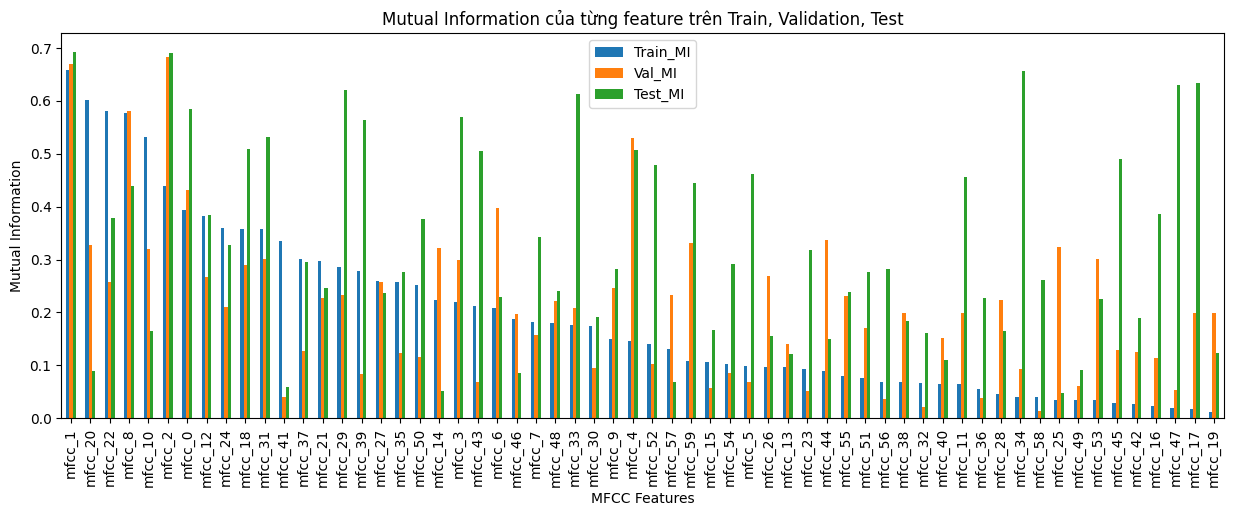

         Train_MI    Val_MI   Test_MI
mfcc_1   0.658990  0.669677  0.693073
mfcc_20  0.602057  0.326855  0.088412
mfcc_22  0.580638  0.257021  0.378165
mfcc_8   0.576918  0.580488  0.439587
mfcc_10  0.531026  0.318920  0.165174
mfcc_2   0.438866  0.681970  0.690060
mfcc_0   0.394393  0.430603  0.583870
mfcc_12  0.382771  0.267820  0.384423
mfcc_24  0.359483  0.210830  0.327620
mfcc_18  0.358518  0.289683  0.509046


In [12]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

# Định nghĩa hàm tính Mutual Information
def compute_mi(df, feature_cols, label_col):
    X = df[feature_cols].values
    y = df[label_col].values
    mi_scores = mutual_info_classif(X, y, discrete_features=False)
    return pd.Series(mi_scores, index=feature_cols)

# Load dữ liệu từ các file
train_df = pd.read_csv(r"D:\Workplace\.SPRING2025\AIL303m\Bee_Swarming\mfcc_features_buzz2\Train_mfcc_features.csv")
test_df = pd.read_csv(r"D:\Workplace\.SPRING2025\AIL303m\Bee_Swarming\mfcc_features_buzz2\Test_mfcc_features.csv")
val_df = pd.read_csv(r"D:\Workplace\.SPRING2025\AIL303m\Bee_Swarming\mfcc_features_buzz2\Val_mfcc_features.csv")

# Xác định danh sách feature columns
feature_cols = [col for col in train_df.columns if col.startswith("mfcc_")]
label_col = "label"

# Tính MI cho từng tập dữ liệu
mi_train = compute_mi(train_df, feature_cols, label_col)
mi_val = compute_mi(val_df, feature_cols, label_col)
mi_test = compute_mi(test_df, feature_cols, label_col)

# Tạo DataFrame để so sánh
mi_comparison = pd.DataFrame({
    "Train_MI": mi_train,
    "Val_MI": mi_val,
    "Test_MI": mi_test
}).sort_values(by="Train_MI", ascending=False)

# Vẽ biểu đồ so sánh Mutual Information giữa các tập
plt.figure(figsize=(12, 6))
mi_comparison.plot(kind="bar", figsize=(15,5))
plt.title("Mutual Information của từng feature trên Train, Validation, Test")
plt.xlabel("MFCC Features")
plt.ylabel("Mutual Information")
plt.show()

# Hiển thị 10 feature quan trọng nhất theo MI của Train
print(mi_comparison.head(10))


## Train

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
import os
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [14]:
train_df = pd.read_csv(r"D:\Workplace\.SPRING2025\AIL303m\Bee_Swarming\mfcc_features_buzz2\Train_mfcc_features.csv")
test_df = pd.read_csv(r"D:\Workplace\.SPRING2025\AIL303m\Bee_Swarming\mfcc_features_buzz2\Test_mfcc_features.csv")
val_df = pd.read_csv(r"D:\Workplace\.SPRING2025\AIL303m\Bee_Swarming\mfcc_features_buzz2\Val_mfcc_features.csv")

In [15]:
train_df = train_df.drop(columns=['file_name'])
test_df = test_df.drop(columns=['file_name'])
val_df = val_df.drop(columns=['file_name'])

In [16]:
X_train, y_train = train_df.drop(columns=['label']), train_df['label']
X_test, y_test = test_df.drop(columns=['label']), test_df['label']
X_val, y_val = val_df.drop(columns=['label']), val_df['label']

In [17]:
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}, Val shape: {X_val.shape}")

Train shape: (19002, 180), Test shape: (11200, 180), Val shape: (4449, 180)


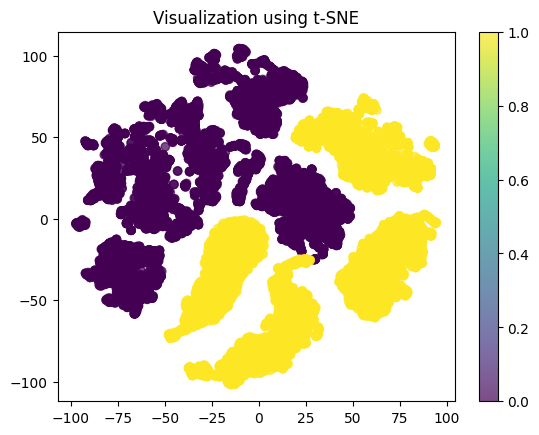

In [18]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Giảm chiều dữ liệu xuống 2D bằng t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.colorbar()
plt.title("Visualization using t-SNE")
plt.show()


In [19]:
def imbalance_ratio(y):
    counts = pd.Series(y).value_counts()
    return counts.max() / counts.min()

print("Imbalance Ratio in Train Set:", imbalance_ratio(y_train))
print("Imbalance Ratio in Test Set:", imbalance_ratio(y_test))
print("Imbalance Ratio in Validation Set:", imbalance_ratio(y_val))

Imbalance Ratio in Train Set: 1.0368742630507022
Imbalance Ratio in Test Set: 1.0
Imbalance Ratio in Validation Set: 1.0222727272727272


### KNN

In [20]:
scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)
X_val_Scaled = scaler.transform(X_val)

In [21]:
param_grid = {
    'n_neighbors': list(range(3, 100, 2)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(
    estimator=knn, param_grid=param_grid, 
    cv=5, scoring='accuracy', n_jobs=-1, verbose=1
)

grid_search.fit(X_val_Scaled, y_val)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

Fitting 5 folds for each of 392 candidates, totalling 1960 fits
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 1.0000


C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [22]:
best_knn = KNeighborsClassifier(
    n_neighbors=best_params['n_neighbors'], 
    weights=best_params['weights'], 
    algorithm=best_params['algorithm']
)

best_knn.fit(X_train_Scaled, y_train)

y_pred_test = best_knn.predict(X_test_Scaled)
y_pred_val = best_knn.predict(X_val_Scaled)

def evaluate_model(y_true, y_pred):
    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "f1_score": f1_score(y_true, y_pred),
        "classification_report": classification_report(y_true, y_pred, output_dict=True)
    }

test_results = evaluate_model(y_test, y_pred_test)
val_results = evaluate_model(y_val, y_pred_val)

print("\nTest Set Results:")
print(f"Accuracy: {test_results['accuracy']:.4f}")
print(f"F1 Score: {test_results['f1_score']:.4f}")
print("Classification Report:", test_results["classification_report"])

print("\nValidation Set Results:")
print(f"Accuracy: {val_results['accuracy']:.4f}")
print(f"F1 Score: {val_results['f1_score']:.4f}")
print("Classification Report:", val_results["classification_report"])


Test Set Results:
Accuracy: 0.9429
F1 Score: 0.9459
Classification Report: {'0': {'precision': 1.0, 'recall': 0.8857142857142857, 'f1-score': 0.9393939393939394, 'support': 5600.0}, '1': {'precision': 0.8974358974358975, 'recall': 1.0, 'f1-score': 0.9459459459459459, 'support': 5600.0}, 'accuracy': 0.9428571428571428, 'macro avg': {'precision': 0.9487179487179487, 'recall': 0.9428571428571428, 'f1-score': 0.9426699426699428, 'support': 11200.0}, 'weighted avg': {'precision': 0.9487179487179487, 'recall': 0.9428571428571428, 'f1-score': 0.9426699426699428, 'support': 11200.0}}

Validation Set Results:
Accuracy: 0.9755
F1 Score: 0.9763
Classification Report: {'0': {'precision': 0.9985693848354793, 'recall': 0.9518181818181818, 'f1-score': 0.9746334652082849, 'support': 2200.0}, '1': {'precision': 0.9549319727891157, 'recall': 0.9986660738105825, 'f1-score': 0.9763094979352315, 'support': 2249.0}, 'accuracy': 0.9755001123848056, 'macro avg': {'precision': 0.9767506788122975, 'recall': 0.

### SVM

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [24]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

scaler = StandardScaler()
X_Val_Scaled = scaler.fit_transform(X_val)

svm = SVC(kernel='rbf')
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_Val_Scaled, y_val)

best_C = grid_search.best_params_['C']
print(f"Best C found: {best_C}")

Best C found: 1


In [25]:
svm = SVC(kernel='rbf', C=1, shrinking=False)
svm.fit(X_train_Scaled, y_train)

y_pred_test = svm.predict(X_test_Scaled)
y_pred_val = svm.predict(X_val_Scaled)

def evaluate_model(y_true, y_pred, dataset_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)

    print(f"{dataset_name} Performance:")
    print(f"   Accuracy: {accuracy:.4f}")
    print(f"   F1 Score: {f1:.4f}\n")
    print("Classification Report:\n", report)

    return {"accuracy": accuracy, "f1_score": f1, "report": report}

test_results = evaluate_model(y_test, y_pred_test, "Test Set (Scaled MFCC)")
val_results = evaluate_model(y_val, y_pred_val, "Validation Set (Scaled MFCC)")

Test Set (Scaled MFCC) Performance:
   Accuracy: 0.8076
   F1 Score: 0.8386

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.62      0.76      5600
           1       0.72      1.00      0.84      5600

    accuracy                           0.81     11200
   macro avg       0.86      0.81      0.80     11200
weighted avg       0.86      0.81      0.80     11200

Validation Set (Scaled MFCC) Performance:
   Accuracy: 0.9737
   F1 Score: 0.9746

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97      2200
           1       0.95      1.00      0.97      2249

    accuracy                           0.97      4449
   macro avg       0.98      0.97      0.97      4449
weighted avg       0.98      0.97      0.97      4449



### NB

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score

nb_raw = GaussianNB()

nb_raw.fit(X_train, y_train)

y_test_pred_raw = nb_raw.predict(X_test)
y_val_pred_raw = nb_raw.predict(X_val)

def evaluate_model(y_true, y_pred, model_type):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{model_type} Model Performance:")
    print(f"   Accuracy: {accuracy:.4f}")
    print(f"   F1 Score: {f1:.4f}")
    return accuracy, f1

print("\nEvaluating Naïve Bayes on Raw MFCC Features:")
test_results_raw = evaluate_model(y_test, y_test_pred_raw, "NB Raw (Test)")
val_results_raw = evaluate_model(y_val, y_val_pred_raw, "NB Raw (Validation)")



Evaluating Naïve Bayes on Raw MFCC Features:

NB Raw (Test) Model Performance:
   Accuracy: 0.9724
   F1 Score: 0.9732

NB Raw (Validation) Model Performance:
   Accuracy: 0.9863
   F1 Score: 0.9866


### RF

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

feature selection

In [28]:
rf_initial = RandomForestClassifier(n_estimators=100, random_state=42)
rf_initial.fit(X_train, y_train)

# Lấy độ quan trọng của từng feature
feature_importances = rf_initial.feature_importances_

# Chọn các feature có importance
threshold = np.mean(feature_importances)
important_features = np.where(feature_importances > threshold)[0]

# Lọc tập dữ liệu theo các feature quan trọng
X_train_selected = X_train.iloc[:, important_features]
X_test_selected = X_test.iloc[:, important_features]
X_val_selected = X_val.iloc[:, important_features]

In [29]:
param_grid = {'n_estimators': list(range(25, 201, 5))}
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

best_params = grid_search.best_params_
print("Best n_estimators:", best_params['n_estimators'])


Best n_estimators: 30


In [30]:
# Hiển thị số feature trước và sau khi giảm chiều
num_features_before = X_train.shape[1]
num_features_after = X_train_selected.shape[1]

print(f"\nSố lượng feature trước khi giảm chiều: {num_features_before}")
print(f"Số lượng feature sau khi giảm chiều: {num_features_after}")



Số lượng feature trước khi giảm chiều: 180
Số lượng feature sau khi giảm chiều: 31


In [31]:
rf_selected = RandomForestClassifier(n_estimators=best_params['n_estimators'], random_state=42)
rf_selected.fit(X_train_selected, y_train)

# Dự đoán trên tập test và validation
y_test_pred_selected = rf_selected.predict(X_test_selected)
y_val_pred_selected = rf_selected.predict(X_val_selected)

# Hàm đánh giá mô hình
def evaluate_model(y_true, y_pred, model_type):
    precision = precision_score(y_true, y_pred, average="binary")
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{model_type} Model Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Classification Report:\n{classification_report(y_true, y_pred)}")
    return precision, accuracy, f1

print("\nEvaluating Model after Feature Selection:")
selected_test_results = evaluate_model(y_test, y_test_pred_selected, "rf Selected (Test)")
selected_val_results = evaluate_model(y_val, y_val_pred_selected, "rf Selected (Validation)")



Evaluating Model after Feature Selection:

rf Selected (Test) Model Performance:
Accuracy: 0.9888
F1 Score: 0.9890
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5600
           1       0.98      1.00      0.99      5600

    accuracy                           0.99     11200
   macro avg       0.99      0.99      0.99     11200
weighted avg       0.99      0.99      0.99     11200


rf Selected (Validation) Model Performance:
Accuracy: 0.9867
F1 Score: 0.9870
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2200
           1       0.98      1.00      0.99      2249

    accuracy                           0.99      4449
   macro avg       0.99      0.99      0.99      4449
weighted avg       0.99      0.99      0.99      4449



feature selection + PCA

In [32]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np

# Huấn luyện mô hình RandomForest để lấy feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Lấy độ quan trọng của từng feature
feature_importances = rf.feature_importances_

# Xác định ngưỡng trung bình
threshold = np.mean(feature_importances)

# Tách feature quan trọng và ít quan trọng
important_features_idx = np.where(feature_importances >= threshold)[0]
less_important_features_idx = np.where(feature_importances < threshold)[0]

X_train_selected = X_train.iloc[:, important_features_idx]
X_test_selected = X_test.iloc[:, important_features_idx]
X_val_selected = X_val.iloc[:, important_features_idx]

# Xác định số lượng feature từng bước
print(f"Tổng số feature ban đầu: {X_train.shape[1]}")
print(f"feature selection: {X_train_selected.shape[1]}")
print(f"PCA: {len(less_important_features_idx)}")

# Chuẩn hóa dữ liệu trước khi áp dụng PCA
scaler = StandardScaler()
X_train_pca_input = scaler.fit_transform(X_train.iloc[:, less_important_features_idx])
X_test_pca_input = scaler.transform(X_test.iloc[:, less_important_features_idx])
X_val_pca_input = scaler.transform(X_val.iloc[:, less_important_features_idx])

# Áp dụng PCA lên phần feature ít quan trọng
n_pca_components = min(5, len(less_important_features_idx))
if n_pca_components > 0:
    pca = PCA(n_components=n_pca_components)
    X_train_pca = pca.fit_transform(X_train_pca_input)
    X_test_pca = pca.transform(X_test_pca_input)
    X_val_pca = pca.transform(X_val_pca_input)
    print(f"PCA component: {n_pca_components}")
else:
    X_train_pca = np.empty((X_train.shape[0], 0))
    X_test_pca = np.empty((X_test.shape[0], 0))
    X_val_pca = np.empty((X_val.shape[0], 0))
    print("Không có feature nào được PCA giữ lại!")

# Ghép dữ liệu lại
X_train_final = np.hstack((X_train_selected, X_train_pca))
X_test_final = np.hstack((X_test_selected, X_test_pca))
X_val_final = np.hstack((X_val_selected, X_val_pca))

print(f"sau Feature Selection + PCA: {X_train_final.shape[1]}")

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_val_final, y_val)

best_params = grid_search.best_params_
print("\nBest Parameters:", best_params)

# Huấn luyện lại mô hình với tham số tối ưu
rf_final = RandomForestClassifier(**best_params, random_state=42)
rf_final.fit(X_train_final, y_train)

# Dự đoán và đánh giá
y_test_pred = rf_final.predict(X_test_final)
y_val_pred = rf_final.predict(X_val_final)

evaluate_model(y_test, y_test_pred, "rf Hybrid (Test)")
evaluate_model(y_val, y_val_pred, "rf Hybrid (Validation)")


Tổng số feature ban đầu: 180
feature selection: 31
PCA: 149
PCA component: 5
sau Feature Selection + PCA: 36

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}

rf Hybrid (Test) Model Performance:
Accuracy: 0.9946
F1 Score: 0.9947
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5600
           1       0.99      1.00      0.99      5600

    accuracy                           0.99     11200
   macro avg       0.99      0.99      0.99     11200
weighted avg       0.99      0.99      0.99     11200


rf Hybrid (Validation) Model Performance:
Accuracy: 0.9962
F1 Score: 0.9962
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2200
           1       0.99      1.00      1.00      2249

    accuracy                           1.00      4449
   macro avg       1.00      1.00      1.00      4449
weighted avg   

(0.9924977934686673, 0.9961789166104743, 0.996234772978959)

### ensemble learning

#### Soft Voting

In [33]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


best_models = [
    ("NB", GaussianNB()),
    ("Random Forest", RandomForestClassifier(
        n_estimators=35, criterion="gini", max_depth=None, min_samples_split=2, random_state=42
    ))
]

soft_voting_clf = VotingClassifier(estimators=best_models, voting='soft', n_jobs=-1)
soft_voting_clf.fit(X_train_final, y_train)

# Dự đoán
y_val_pred = soft_voting_clf.predict(X_val_final)
y_test_pred = soft_voting_clf.predict(X_test_final)

# Đánh giá
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("\nĐánh giá Soft Voting trên tập validation:")
print(classification_report(y_val, y_val_pred))

print("\nĐánh giá Soft Voting trên tập test:")
print(classification_report(y_test, y_test_pred))

print(f"Accuracy trên tập validation: {val_acc:.4f}")
print(f"Accuracy trên tập test: {test_acc:.4f}")


Đánh giá Soft Voting trên tập validation:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2200
           1       0.96      1.00      0.98      2249

    accuracy                           0.98      4449
   macro avg       0.98      0.98      0.98      4449
weighted avg       0.98      0.98      0.98      4449


Đánh giá Soft Voting trên tập test:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      5600
           1       0.90      1.00      0.95      5600

    accuracy                           0.95     11200
   macro avg       0.95      0.95      0.95     11200
weighted avg       0.95      0.95      0.95     11200

Accuracy trên tập validation: 0.9804
Accuracy trên tập test: 0.9460


#### Hard Voting

In [34]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier

best_models = [
    ("NB", GaussianNB()),
    ("Random Forest", RandomForestClassifier(
        n_estimators=35, criterion="entropy", max_depth=None, min_samples_split=2, random_state=42
    )),
    ("Extra Trees", ExtraTreesClassifier(
        criterion="entropy", max_depth=None, min_samples_split=2, n_estimators=200, random_state=42
    ))
]

soft_voting_clf = VotingClassifier(estimators=best_models, voting='hard', n_jobs=-1)
soft_voting_clf.fit(X_train_final, y_train)

# Dự đoán
y_val_pred = soft_voting_clf.predict(X_val_final)
y_test_pred = soft_voting_clf.predict(X_test_final)

# Đánh giá
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("\nĐánh giá Soft Voting trên tập validation:")
print(classification_report(y_val, y_val_pred))

print("\nĐánh giá Soft Voting trên tập test:")
print(classification_report(y_test, y_test_pred))

print(f"Accuracy trên tập validation: {val_acc:.4f}")
print(f"Accuracy trên tập test: {test_acc:.4f}")


Đánh giá Soft Voting trên tập validation:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2200
           1       0.99      1.00      1.00      2249

    accuracy                           1.00      4449
   macro avg       1.00      1.00      1.00      4449
weighted avg       1.00      1.00      1.00      4449


Đánh giá Soft Voting trên tập test:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      5600
           1       0.94      1.00      0.97      5600

    accuracy                           0.97     11200
   macro avg       0.97      0.97      0.97     11200
weighted avg       0.97      0.97      0.97     11200

Accuracy trên tập validation: 0.9964
Accuracy trên tập test: 0.9691


#### Weighted Voting

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier

best_models = [
    ("NB", GaussianNB()),
    ("Random Forest", RandomForestClassifier(
        n_estimators=35, criterion="entropy", max_depth=None, min_samples_split=2, random_state=42
    ))
]


weights = []
for name, model in best_models:
    model.fit(X_train_final, y_train)
    y_val_pred = model.predict(X_val_final)
    acc = accuracy_score(y_val, y_val_pred)
    weights.append(acc)
    
print("Weights theo accuracy trên validation:", weights)

soft_voting_clf = VotingClassifier(estimators=best_models, voting='soft', weights=weights, n_jobs=-1)

soft_voting_clf.fit(X_train_final, y_train)

y_val_pred = soft_voting_clf.predict(X_val_final)
y_test_pred = soft_voting_clf.predict(X_test_final)

val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Accuracy on validation: {val_acc:.4f}")
print(classification_report(y_val, y_val_pred))

print(f"Accuracy on test: {test_acc:.4f}")
print(classification_report(y_test, y_test_pred))

Weights theo accuracy trên validation: [0.9777478084962913, 0.9934816812766913]
Accuracy on validation: 0.9798
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2200
           1       0.96      1.00      0.98      2249

    accuracy                           0.98      4449
   macro avg       0.98      0.98      0.98      4449
weighted avg       0.98      0.98      0.98      4449

Accuracy on test: 0.9437
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      5600
           1       0.90      1.00      0.95      5600

    accuracy                           0.94     11200
   macro avg       0.95      0.94      0.94     11200
weighted avg       0.95      0.94      0.94     11200



#### Stacking

In [36]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Tạo các mô hình base
best_models = [
    ("NB", GaussianNB()),
    ("Random Forest", RandomForestClassifier(
        n_estimators=35, criterion="entropy", max_depth=None, min_samples_split=2, random_state=42
    ))
]

# Meta model - dùng Logistic Regression (thay vì Linear Regression vì bài toán phân loại)
meta_model = LogisticRegression(random_state=42)

# Tạo Stacking Classifier
stacking_clf = StackingClassifier(estimators=best_models, final_estimator=meta_model, cv=5, n_jobs=-1)

# Huấn luyện mô hình
stacking_clf.fit(X_train_final, y_train)

# Dự đoán
y_val_pred = stacking_clf.predict(X_val_final)
y_test_pred = stacking_clf.predict(X_test_final)

# Đánh giá mô hình
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("\nĐánh giá Stacking trên tập validation:")
print(classification_report(y_val, y_val_pred))
print(f"Accuracy trên tập validation: {val_acc:.4f}")

print("\nĐánh giá Stacking trên tập test:")
print(classification_report(y_test, y_test_pred))
print(f"Accuracy trên tập test: {test_acc:.4f}")



Đánh giá Stacking trên tập validation:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2200
           1       0.97      1.00      0.98      2249

    accuracy                           0.98      4449
   macro avg       0.98      0.98      0.98      4449
weighted avg       0.98      0.98      0.98      4449

Accuracy trên tập validation: 0.9829

Đánh giá Stacking trên tập test:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      5600
           1       0.91      1.00      0.95      5600

    accuracy                           0.95     11200
   macro avg       0.95      0.95      0.95     11200
weighted avg       0.95      0.95      0.95     11200

Accuracy trên tập test: 0.9483


In [37]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Định nghĩa tập tham số cần tìm kiếm
param_grid = {
    'criterion' :['gini', 'entropy', 'log_loss'],
    'n_estimators': [30, 40, 50, 60, 100, 150, 200],
    'max_depth': [ 10, 20, 30],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

# Khởi tạo mô hình Random Forest
rf_model = ExtraTreesClassifier(random_state=42)

# Khởi tạo GridSearchCV với 5-fold cross-validation
grid_search = GridSearchCV(
    rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1
)

# Chạy Grid Search trên tập huấn luyện
grid_search.fit(X_train_final, y_train)

# Lấy tham số tốt nhất
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Huấn luyện mô hình với tham số tối ưu
best_model = ExtraTreesClassifier(**best_params, random_state=42)
best_model.fit(X_train_final, y_train)

# Dự đoán trên tập validation và test
y_val_pred = best_model.predict(X_val_final)
y_test_pred = best_model.predict(X_test_final)

print("\nĐánh giá trên tập validation:")
print(classification_report(y_val, y_val_pred))
val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
print(f"Accuracy trên tập validation: {val_accuracy:.4f}")
print(f"F1 Score trên tập validation: {val_f1:.4f}")

# Đánh giá mô hình trên tập test
print("\nĐánh giá trên tập test:")
print(classification_report(y_test, y_test_pred))
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
print(f"Accuracy trên tập test: {test_accuracy:.4f}")
print(f"F1 Score trên tập test: {test_f1:.4f}")

Fitting 5 folds for each of 567 candidates, totalling 2835 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 150}

Đánh giá trên tập validation:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2200
           1       0.99      1.00      1.00      2249

    accuracy                           1.00      4449
   macro avg       1.00      1.00      1.00      4449
weighted avg       1.00      1.00      1.00      4449

Accuracy trên tập validation: 0.9971
F1 Score trên tập validation: 0.9971

Đánh giá trên tập test:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5600
           1       0.98      1.00      0.99      5600

    accuracy                           0.99     11200
   macro avg       0.99      0.99      0.99     11200
weighted avg       0.99      0.99      0.99     11200

Accuracy trên tập test: 0.9916
F1 Score trên tập